In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
import joblib

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
train = pd.read_csv('fraudTrain.csv')
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970,Jennifer,Banks,F,561 Perry Cove,...,36.079,-81.178,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011,-82.048,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.888,-118.210,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159,-118.186,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110,Edward,Sanchez,M,594 White Dale Suite 530,...,42.181,-112.262,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.151,-112.154,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.231,-112.114,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034,-112.561,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960,Tyler,Garcia,M,408 Bradley Rest,...,38.421,-79.463,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.675,-78.632,0


In [4]:
train.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
train.shape

(1296675, 22)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [7]:
train.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675.000,1296675.000,1296675.000,1296675.000,1296675.000,1296675.000,1296675.000,1296675.000,1296675.000,1296675.000
mean,417192042079641088.000,70.351,48800.671,38.538,-90.226,88824.441,1349243636.726,38.537,-90.226,0.006
std,1308806447000789248.000,160.316,26893.222,5.076,13.759,301956.361,12841278.423,5.110,13.771,0.076
min,60416207185.000,1.000,1257.000,20.027,-165.672,23.000,1325376018.000,19.028,-166.671,0.000
25%,180042946491150.000,9.650,26237.000,34.620,-96.798,743.000,1338750742.500,34.734,-96.897,0.000
50%,3521417320836166.000,47.520,48174.000,39.354,-87.477,2456.000,1349249747.000,39.366,-87.438,0.000
75%,4642255475285942.000,83.140,72042.000,41.940,-80.158,20328.000,1359385375.500,41.957,-80.237,0.000
max,4992346398065154048.000,28948.900,99783.000,66.693,-67.950,2906700.000,1371816817.000,67.510,-66.951,1.000


In [8]:
train.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
train[train.duplicated()]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


<AxesSubplot:>

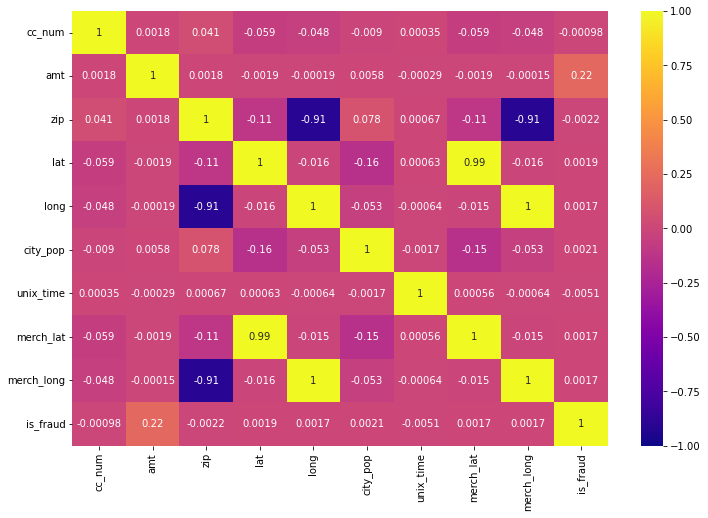

In [10]:
sns.heatmap(train.corr(),annot=True,cmap='plasma',vmin=-1,vmax=1)

In [11]:
train.drop(['first','last','street','trans_num'],axis=1,inplace=True)

In [12]:
train['gender'].replace('F',0,inplace=True)
train['gender'].replace('M',1,inplace=True)
train['gender'] = train['gender'].astype(int)

In [13]:
for col in train.columns:
    print(col,train[col].nunique())

trans_date_trans_time 1274791
cc_num 983
merchant 693
category 14
amt 52928
gender 2
city 894
state 51
zip 970
lat 968
long 969
city_pop 879
job 494
dob 968
unix_time 1274823
merch_lat 1247805
merch_long 1275745
is_fraud 2


In [14]:
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])

In [15]:
train['trans_date_trans_time'] = train['trans_date_trans_time'].apply(lambda x: x.timestamp())
train['trans_date_trans_time'] = train['trans_date_trans_time'].astype(float)

In [16]:
categories = pd.get_dummies(train['category'],drop_first=True)
train = pd.concat([train,categories],axis=1)
train.drop('category',axis=1,inplace=True)

In [17]:
train.drop(['city','dob','zip'],axis=1,inplace=True)

In [18]:
train['food_dining'] = train['food_dining'].astype(int)
train['gas_transport'] = train['gas_transport'].astype(int)
train['grocery_net'] = train['grocery_net'].astype(int)
train['grocery_pos'] = train['grocery_pos'].astype(int)
train['health_fitness'] = train['health_fitness'].astype(int)
train['home'] = train['home'].astype(int)
train['kids_pets'] = train['kids_pets'].astype(int)
train['misc_net'] = train['misc_net'].astype(int)
train['misc_pos'] = train['misc_pos'].astype(int)
train['personal_care'] = train['personal_care'].astype(int)
train['shopping_net'] = train['shopping_net'].astype(int)
train['shopping_pos'] = train['shopping_pos'].astype(int)
train['travel'] = train['travel'].astype(int)

In [19]:
# train['merchant'] = LabelEncoder().fit_transform(train['merchant'])
# train['state'] = LabelEncoder().fit_transform(train['state'])
# train['job'] = LabelEncoder().fit_transform(train['job'])
train.drop(['merchant','state','job'],axis=1,inplace=True)

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

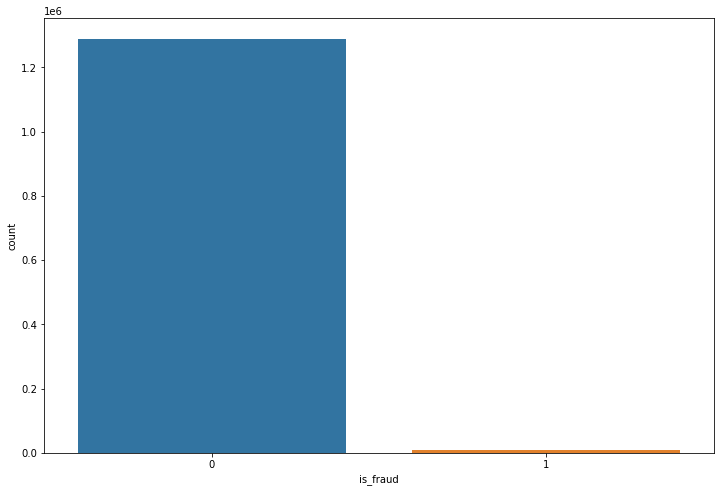

In [20]:
sns.countplot(train['is_fraud'])

In [21]:
X = train.drop('is_fraud',axis=1)
y = train['is_fraud']

In [22]:
ros = RandomOverSampler()
X,y = ros.fit_resample(X,y)

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

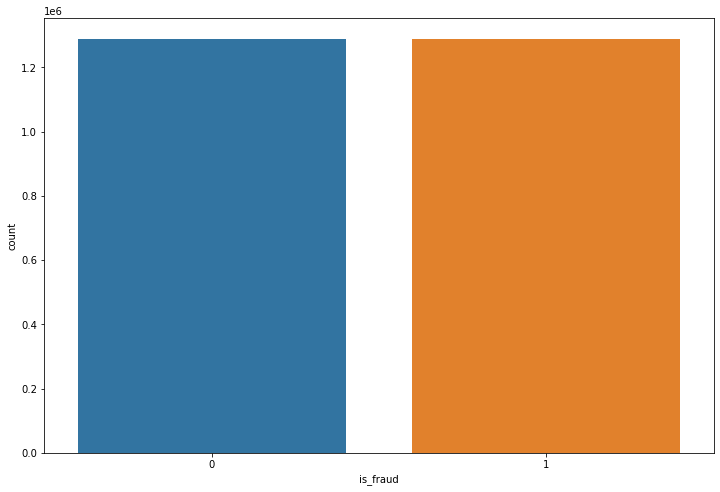

In [23]:
sns.countplot(y)

In [24]:
X.columns

Index(['trans_date_trans_time', 'cc_num', 'amt', 'gender', 'lat', 'long',
       'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'food_dining',
       'gas_transport', 'grocery_net', 'grocery_pos', 'health_fitness', 'home',
       'kids_pets', 'misc_net', 'misc_pos', 'personal_care', 'shopping_net',
       'shopping_pos', 'travel'],
      dtype='object')

In [25]:
X.drop(['trans_date_trans_time','unix_time'],axis=1,inplace=True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [27]:
X_train.columns

Index(['cc_num', 'amt', 'gender', 'lat', 'long', 'city_pop', 'merch_lat',
       'merch_long', 'food_dining', 'gas_transport', 'grocery_net',
       'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
       'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos', 'travel'],
      dtype='object')

In [28]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [33]:
X_train.head()

,cc_num,amt,gender,lat,long,city_pop,merch_lat,merch_long,food_dining,gas_transport,...,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
806591,378278619832195,9.270,0,44.038,-123.061,191096,44.879,-122.705,0,0,...,0,0,0,0,1,0,0,0,0,0
924753,4503101193493052928,2.920,0,27.986,-82.014,237282,28.272,-81.784,0,0,...,0,0,0,1,0,0,0,0,0,0
1124747,4745996322265,137.560,0,41.480,-86.692,1423,41.059,-87.210,0,0,...,0,0,0,0,1,0,0,0,0,0
2358428,3541160328600277,1064.530,1,39.572,-90.238,1512,39.277,-90.523,0,0,...,0,0,0,0,0,0,0,1,0,0
1635946,213174467670432,339.860,1,39.401,-75.865,663,39.616,-76.716,0,0,...,1,0,0,0,0,0,0,0,0,0


In [30]:
print(metrics.confusion_matrix(y_test,dtree_pred))
print(metrics.classification_report(y_test,dtree_pred))

[[320950    724]
 [     0 322911]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    321674
           1       1.00      1.00      1.00    322911

    accuracy                           1.00    644585
   macro avg       1.00      1.00      1.00    644585
weighted avg       1.00      1.00      1.00    644585



In [31]:
joblib.dump(dtree,'model.pkl')

['model.pkl']